In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.isnull().sum()
# No null values

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
df=data.drop(["Unnamed: 0"],axis=1)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.skew()

Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

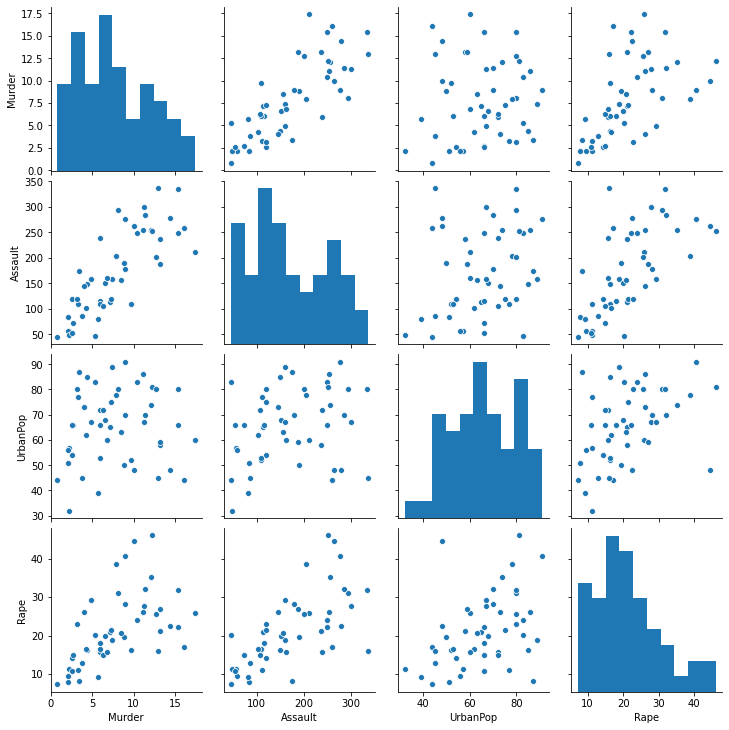

In [8]:
sns.pairplot(df)

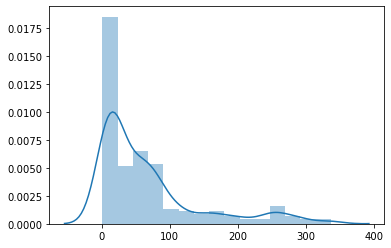

In [9]:
sns.distplot(df)
#df is positively skewed

{'whiskers': [<matplotlib.lines.Line2D at 0x172cc96d0>,
 'caps': [<matplotlib.lines.Line2D at 0x172cc9d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x172cc9370>],
 'medians': [<matplotlib.lines.Line2D at 0x163a44490>],
 'fliers': [<matplotlib.lines.Line2D at 0x163a44790>],
 'means': []}

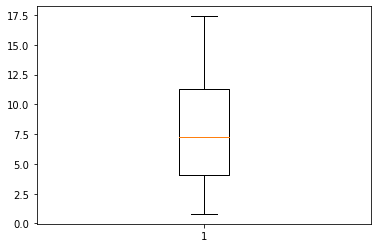

In [10]:
plt.boxplot(df.Murder,vert=True)
# No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x163a9c490>,
 'caps': [<matplotlib.lines.Line2D at 0x163a9cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x163a9c130>],
 'medians': [<matplotlib.lines.Line2D at 0x163aa6250>],
 'fliers': [<matplotlib.lines.Line2D at 0x163aa6550>],
 'means': []}

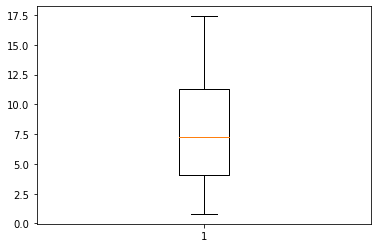

In [11]:
plt.boxplot(df.Murder,vert=True)
# No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x163af8250>,
 'caps': [<matplotlib.lines.Line2D at 0x163af8910>,
 'boxes': [<matplotlib.lines.Line2D at 0x163aebeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x163af8fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x163b01310>],
 'means': []}

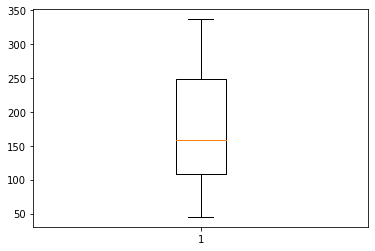

In [12]:
plt.boxplot(df.Assault,vert=True)
# No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x172cd9130>,
 'caps': [<matplotlib.lines.Line2D at 0x172cd97f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x163bfcd90>],
 'medians': [<matplotlib.lines.Line2D at 0x172cd9eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x172ce31f0>],
 'means': []}

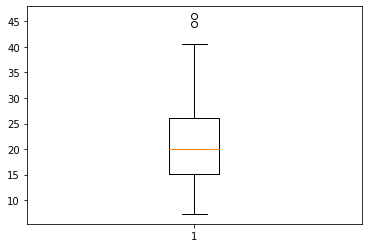

In [15]:
plt.boxplot(df.Rape,vert=True)
# outliers present

In [17]:
Q1=df["Rape"].quantile(0.25)
Q3=df["Rape"].quantile(0.75)
IQR=Q3-Q1
LW=Q1-1.5*IQR
UW=Q3+1.5*IQR
df=df[df["Rape"]<UW]
df.head()
# Treating outliers

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


{'whiskers': [<matplotlib.lines.Line2D at 0x172d8f940>,
 'caps': [<matplotlib.lines.Line2D at 0x172d9a040>,
 'boxes': [<matplotlib.lines.Line2D at 0x172d8f5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x172d9a700>],
 'fliers': [<matplotlib.lines.Line2D at 0x172d9aa00>],
 'means': []}

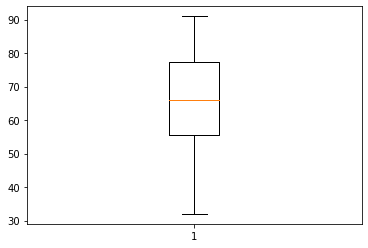

In [18]:
plt.boxplot(df.UrbanPop,vert=True)
# No outliers

In [19]:
df["sn"]=np.arange(len(df))
df.head()
# To check for scatterplot whether the datapoints are linearly seperable or not

<ipython-input-19-f2a7985bf9e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sn"]=np.arange(len(df))


,Murder,Assault,UrbanPop,Rape,sn
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,4


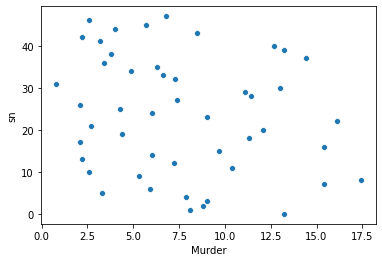

In [20]:
sns.scatterplot(data=df,x="Murder",y="sn")
# All datapoints are linearly seperable and less datapoints are there thus we use agglomorative clustering

In [21]:
df.drop(["sn"],axis=1,inplace=True)
df.head()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


In [22]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df)


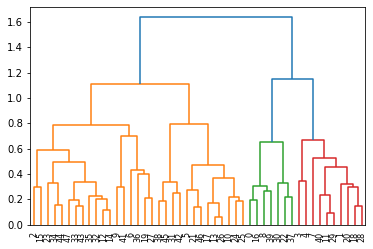

In [25]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [26]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [27]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [28]:
df_norm['h_clusterid'] = pd.Series(y_hc)
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.417417,2.0
2,0.439759,0.852740,0.813559,0.711712,1.0
3,0.481928,0.496575,0.305085,0.366366,3.0
4,0.493976,0.791096,1.000000,1.000000,3.0
5,0.427711,0.544521,0.779661,0.942943,0.0
6,0.150602,0.222603,0.762712,0.114114,1.0
7,0.307229,0.660959,0.677966,0.255255,3.0
8,0.879518,0.993151,0.813559,0.738739,2.0
9,1.000000,0.568493,0.474576,0.555556,1.0
10,0.271084,0.003425,0.864407,0.387387,0.0


In [29]:
result=df.groupby(df_norm.h_clusterid).mean()
result

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0.0,8.223077,168.153846,72.307692,23.469231
1.0,7.747059,167.235294,61.352941,19.441176
2.0,10.442857,203.142857,63.714286,21.971429
3.0,5.122222,150.888889,65.888889,17.255556


###  Highest crime city =  cluster 2.0
###  Lowest crime city  =  cluster 3.0